In [23]:
from ast import Del
import numpy as np
import matplotlib.pyplot as plt

# constants

Box_Width = 3.0
Delta = 0.1 * Box_Width
V0 = 30.0

alpha = 1.0
Npoints = 1000

def potential_box(x):
    f = 0.0
    if abs(x) <= Box_Width:
        f = 0.0
    else:
        if abs(x) > Box_Width and abs(x) <= Box_Width + Delta:
            f = V0
        else:
            f = 100 * V0
    #
    return f

def potential_harmonic(x):
    return x**2
#
potential = potential_harmonic
Fvec = np.vectorize(potential)

xi, dx = np.linspace(-Box_Width - Delta, Box_Width + Delta, Npoints, retstep=True)
alpha = alpha * dx**2

In [24]:
%timeit Fvec(xi)

156 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
%timeit np.array([potential(_) for _ in xi])

273 µs ± 2.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
Vi = Fvec(xi)
Psi = np.zeros(xi.shape)

In [27]:
def boundary(E):
    Psi[1] = 0.0001
    for i in range(2, Npoints):
        Psi[i] = 2 * Psi[i-1] - (1.0 - alpha * Vi[i-2]) * Psi[i-2] - alpha * E * Psi[i-2]
    return Psi[-1]
#


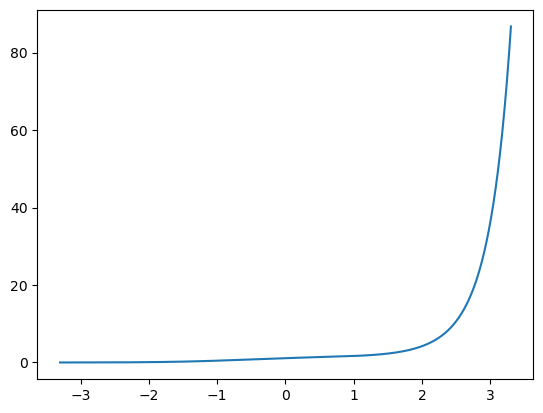

In [28]:
Psi[1] = 0.0001
E = 0.25
for i in range(2, Npoints):
    Psi[i] = 2 * Psi[i-1] - (1.0 - alpha * Vi[i-2]) * Psi[i-2] - alpha * E * Psi[i-2]
#
plt.plot(xi, Psi, '-')

In [31]:
Es = np.linspace(0, 3, 300)
B = [boundary(e) for e in Es]

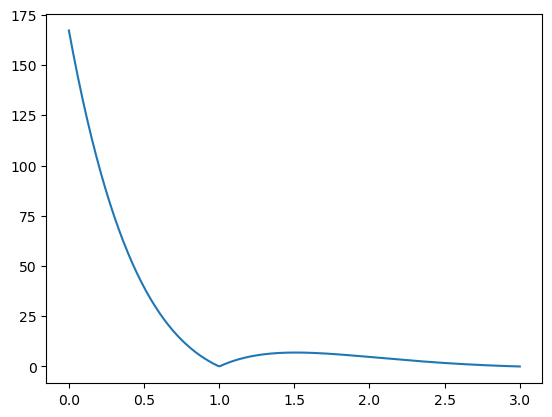

In [32]:
plt.plot(Es, np.abs(B))